In [112]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from rich import print as rp

from pyplier.plier_res import PLIERResults

sns.set_theme()
%matplotlib inline

In [10]:
top = 10
index = (None,)
regress = (False,)
fdr_cutoff = 0.2

In [36]:
plierRes = PLIERResults.from_disk(
    "/Users/milessmith/workspace/pyplier/tests/data/common/plierRes.json.gz"
)

In [ ]:
priorMat = pd.read_csv(
    "/Users/milessmith/workspace/pyplier/tests/data/combine_paths/allPaths.csv.gz",
    index_col=0,
)

data = pd.read_csv(
    "/Users/milessmith/workspace/pyplier/tests/data/common/dataWholeBlood.csv.gz",
    index_col=0,
)

In [39]:
plierRes.summary

,pathway,LV index,AUC,p-value,FDR
1,REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,1,0.667649,1.417382e-06,4.346637e-06
2,IRIS_Monocyte-Day0,2,0.814850,1.945403e-14,2.982952e-13
3,IRIS_Neutrophil-Resting,2,0.870880,2.938813e-29,6.759271e-28
4,DMAP_MONO1,2,0.739320,6.022517e-05,1.231270e-04
5,PID_IL6_7PATHWAY,2,0.712596,7.799121e-03,1.055175e-02
...,...,...,...,...,...
88,KEGG_PARKINSONS_DISEASE,30,0.680757,2.410838e-03,3.759272e-03
89,MIPS_SPLICEOSOME,30,0.530403,2.808670e-01,2.970088e-01
90,REACTOME_TRANSLATION,30,0.969622,1.674163e-19,3.080460e-18
91,REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN...,30,0.952135,5.471947e-14,7.191702e-13


In [9]:
# R version: pval_cutoff = max(plierRes$summary[plierRes$summary[, 5] < fdr.cutoff, 4])

In [41]:
pval_cutoff = plierRes.summary.loc[
    plierRes.summary["FDR"] < fdr_cutoff, "p-value"
].max()
pval_cutoff

0.180801235597124

In [ ]:
# R version: ii <- which(colsums(plierRes$U, parallel = TRUE) > 0)

In [42]:
ii = (plierRes.U.sum(axis=0) > 0).index

In [21]:
index = ["LV1", "LV6"]

In [23]:
index = None

In [43]:
if index is not None:
    ii = ii.intersection(index)

In [ ]:
# R version: tmp <- apply(-plierRes$Z[, ii, drop = F], 2, rank)

In [52]:
tmp = plierRes.Z.loc[:, ii].rank(axis=0, ascending=False)
tmp.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV21,LV22,LV23,LV24,LV25,LV26,LV27,LV28,LV29,LV30
GAS6,4269.0,4117.5,1592.0,2857.0,677.0,1879.0,4475.5,169.0,2725.0,2305.0,...,4388.5,1263.0,4369.5,1021.0,1528.0,37.0,642.0,4297.5,4284.0,4568.5
MMP14,2443.0,2119.0,4048.5,1336.0,134.0,2001.0,4475.5,1675.0,4400.0,4257.0,...,1157.0,4385.0,1447.0,2154.0,76.0,1891.0,4283.0,4297.5,911.0,1145.0
MARCKSL1,4269.0,4117.5,4048.5,4385.0,4426.5,1132.0,2772.0,4351.0,4400.0,4257.0,...,330.0,4385.0,254.0,4314.0,1613.0,4376.5,1831.0,254.0,4284.0,883.0
SPARC,4269.0,4117.5,1656.0,4385.0,4426.5,2469.0,2864.0,4351.0,2511.0,4257.0,...,4388.5,4385.0,4369.5,4314.0,4388.0,4376.5,4283.0,4297.5,4284.0,2017.0
CTSD,4269.0,1553.0,4048.5,4385.0,341.0,4332.0,4475.5,4351.0,2559.0,4257.0,...,4388.5,4385.0,376.0,2455.0,4388.0,4376.5,1981.0,2281.0,4284.0,1757.0


In [33]:
# R version:
# Ustrict = plierRes$U
# Ustrict[plierRes$Up > pval.cutoff] = 0

In [54]:
Ustrict = plierRes.U.copy()

In [58]:
Ustrict[plierRes.Up > pval_cutoff] = 0

In [59]:
# R version:
# pathsUsed = which(rowsums(Ustrict[, index, drop = F], parallel = TRUE) > 0)

In [189]:
pathsUsed = Ustrict[Ustrict.loc[:, ii].sum(axis=1) > 0].index

In [67]:
# R version:
# pathMat = matrix(nrow = 0, ncol = length(pathsUsed))

In [190]:
pathMat = np.zeros((0, len(pathsUsed)))

In [194]:
pd.DataFrame(pathMat)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61


In [72]:
# R version
# nn <- character()
# nncol <- character()
# nnpath <- character()
# nnindex <- double()
# for (i in seq_along(ii)) {
#     nn <- c(nn, nntmp <- names(which(tmp[, i] <= top)))
#     nncol <- c(nncol, rep(rownames(plierRes$U)[which(thispath <- plierRes$U[, ii[i]] == max(plierRes$U[, ii[i]]))], length(nntmp)))
#     nnindex <- c(nnindex, rep(ii[i], length(nntmp)))
#     pathMat <- rbind(pathMat, priorMat[nntmp, pathsUsed, drop = F])
# }

In [195]:
nntmp = {i: tmp.index[np.where(tmp[i] <= top)[0]].values for i in ii}

In [196]:
nn = np.concatenate([tmp.index[np.where(tmp[i] <= top)[0]].values for i in ii])

In [197]:
nn = np.concatenate(list(nntmp.values()))

In [75]:
i = "LV1"

In [198]:
nncol = {
    i: plierRes.U.index[plierRes.U.loc[:, i] == plierRes.U.loc[:, i].max()].repeat(
        len(nntmp[i])
    )
    if plierRes.U.loc[:, i].max() > 0
    else pd.Index([i]).repeat(len(nntmp[i]))
    for i in ii
}
rp(nncol)

{
    'LV1': Index(['REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'],
      dtype='object'),
    'LV2': Index(['IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting'],
      dtype='object'),
    'LV3': Index(['MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME',
       'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME',
       'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME',
       'MIPS_SPLICEOSOME'],
      dtype='object'),
    'LV4': Index(['REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
       'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'],
      dtype='object'),
    'LV5': Index(['IRIS_Monocyte-Day0', 'IRIS_Monocyte-Day0', 'IRIS_Monocyte-Day0',
       'IRIS_Monocyte-Day0', 'IRIS_Monocyte-Day0', 'IRIS_Monocyte-Day0',
       'IRIS_Monocyte-Day0', 'IRIS_Monocyte-Day0', 'IRIS_Monocyte-Day0',
       'IRIS_Monocyte-Day0'],
      dtype='object'),
    'LV6': Index(['DMAP_TCELLA6', 'DMAP_TCELLA6', 'DMAP_TCELLA6', 'DMAP_TCELLA6',
       'DMAP_TCELLA6', 'DMAP_TCELLA6', 'DMAP_TCELLA6', 'DMAP_TCELLA6',
       'DMAP_TCELLA6', 'DMAP_TCELLA6'],
      dtype='object'),
    'LV7': Index(['REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'],
      dtype='object'),
    'LV8': Index(['IRIS_PlasmaCell-FromPBMC', 'IRIS_PlasmaCell-FromPBMC',
       'IRIS_PlasmaCell-FromPBMC', 'IRIS_PlasmaCell-FromPBMC',
       'IRIS_PlasmaCell-FromPBMC', 'IRIS_PlasmaCell-FromPBMC',
       'IRIS_PlasmaCell-FromPBMC', 'IRIS_PlasmaCell-FromPBMC',
       'IRIS_PlasmaCell-FromPBMC', 'IRIS_PlasmaCell-FromPBMC'],
      dtype='object'),
    'LV9': Index(['DMAP_NKA2', 'DMAP_NKA2', 'DMAP_NKA2', 'DMAP_NKA2', 'DMAP_NKA2',
       'DMAP_NKA2', 'DMAP_NKA2', 'DMAP_NKA2', 'DMAP_NKA2', 'DMAP_NKA2'],
      dtype='object'),
    'LV10': Index(['IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
       'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting'],
      dtype='object'),
    'LV11': Index(['DMAP_ERY3', 'DMAP_ERY3', 'DMAP_ERY3', 'DMAP_ERY3', 'DMAP_ERY3',
       'DMAP_ERY3', 'DMAP_ERY3', 'DMAP_ERY3', 'DMAP_ERY3', 'DMAP_ERY3'],
      dtype='object'),
    'LV12': Index(['LV12', 'LV12', 'LV12', 'LV12', 'LV12', 'LV12', 'LV12', 'LV12', 'LV12',


In [199]:
plierRes.U.index[plierRes.U.loc[:, "LV12"] == plierRes.U.loc[:, "LV12"].max()]

Index(['IRIS_Bcell-Memory_IgG_IgA', 'IRIS_Bcell-Memory_IgM',
       'IRIS_Bcell-naive', 'IRIS_CD4Tcell-N0',
       'IRIS_CD4Tcell-Th1-restimulated12hour',
       'IRIS_CD4Tcell-Th1-restimulated48hour',
       'IRIS_CD4Tcell-Th2-restimulated12hour',
       'IRIS_CD4Tcell-Th2-restimulated48hour', 'IRIS_CD8Tcell-N0',
       'IRIS_DendriticCell-Control',
       ...
       'KEGG_GNRH_SIGNALING_PATHWAY', 'KEGG_BASAL_TRANSCRIPTION_FACTORS',
       'REACTOME_SYNTHESIS_OF_DNA', 'KEGG_HEMATOPOIETIC_CELL_LINEAGE',
       'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY', 'PID_IL4_2PATHWAY',
       'REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR', 'PID_BCR_5PATHWAY',
       'PID_TELOMERASEPATHWAY', 'PID_PI3KPLCTRKPATHWAY'],
      dtype='object', length=606)

In [201]:
all(plierRes.U.loc[:, "LV12"] == 0)

True

In [ ]:
#     nnindex <- c(nnindex, rep(ii[i], length(nntmp)))
#     pathMat <- rbind(pathMat, priorMat[nntmp, pathsUsed, drop = F])

In [202]:
nnindex = np.concatenate([list(_) for _ in nncol.values()])
rp(nnindex)

['REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'MIPS_SPLICEOSOME' 'MIPS_SPLICEOSOME'
 'MIPS_SPLICEOSOME' 'MIPS_SPLICEOSOME' 'MIPS_SPLICEOSOME'
 'MIPS_SPLICEOSOME' 'MIPS_SPLICEOSOME' 'MIPS_SPLICEOSOME'
 'MIPS_SPLICEOSOME' 'MIPS_SPLICEOSOME'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'
 'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY' 'IRIS_Monocyte-Day0'
 'IRIS_Monocyte-Day0' 'IRIS_Monocyte-Day0' 'IRIS_Monocyte-Day0'
 'IRIS_Monocyte-Day0' 'IRIS_Monocyte-Day0' 'IRIS_Monocyte-Day0'
 'IRIS_Monocyte-Day0' 'IRIS_Monocyte-Day0' 'IRIS_Monocyte-Day0'
 'DMAP_TCELLA6' 'DMAP_TCELLA6' 'DMAP_TCELLA6' 'DMAP_TCELLA6'
 'DMAP_TCELLA6' 'DMAP_TCELLA6' 'DMAP_TCELLA6' 'DMAP_TCELLA6'
 'DMAP_TCELLA6' 'DMAP_TCELLA6'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA'
 'IRIS_PlasmaCell-FromPBMC' 'IRIS_PlasmaCell-FromPBMC'
 'IRIS_PlasmaCell-FromPBMC' 'IRIS_PlasmaCell-FromPBMC'
 'IRIS_PlasmaCell-FromPBMC' 'IRIS_PlasmaCell-FromPBMC'
 'IRIS_PlasmaCell-FromPBMC' 'IRIS_PlasmaCell-FromPBMC'
 'IRIS_PlasmaCell-FromPBMC' 'IRIS_PlasmaCell-FromPBMC' 'DMAP_NKA2'
 'DMAP_NKA2' 'DMAP_NKA2' 'DMAP_NKA2' 'DMAP_NKA2' 'DMAP_NKA2' 'DMAP_NKA2'
 'DMAP_NKA2' 'DMAP_NKA2' 'DMAP_NKA2' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'DMAP_ERY3' 'DMAP_ERY3' 'DMAP_ERY3' 'DMAP_ERY3'
 'DMAP_ERY3' 'DMAP_ERY3' 'DMAP_ERY3' 'DMAP_ERY3' 'DMAP_ERY3' 'DMAP_ERY3'
 'LV12' 'LV12' 'LV12' 'LV12' 'LV12' 'LV12' 'LV12' 'LV12' 'LV12' 'LV12'
 'LV13' 'LV13' 'LV13' 'LV13' 'LV13' 'LV13' 'LV13' 'LV13' 'LV13' 'LV13'
 'DMAP_TCELLA1' 'DMAP_TCELLA1' 'DMAP_TCELLA1' 'DMAP_TCELLA1'
 'DMAP_TCELLA1' 'DMAP_TCELLA1' 'DMAP_TCELLA1' 'DMAP_TCELLA1'
 'DMAP_TCELLA1' 'DMAP_TCELLA1' 'IRIS_Bcell-naive' 'IRIS_Bcell-naive'
 'IRIS_Bcell-naive' 'IRIS_Bcell-naive' 'IRIS_Bcell-naive'
 'IRIS_Bcell-naive' 'IRIS_Bcell-naive' 'IRIS_Bcell-naive'
 'IRIS_Bcell-naive' 'IRIS_Bcell-naive' 'LV16' 'LV16' 'LV16' 'LV16' 'LV16'
 'LV16' 'LV16' 'LV16' 'LV16' 'LV16' 'LV17' 'LV17' 'LV17' 'LV17' 'LV17'
 'LV17' 'LV17' 'LV17' 'LV17' 'LV17' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'IRIS_Neutrophil-Resting'
 'IRIS_Neutrophil-Resting' 'LV19' 'LV19' 'LV19' 'LV19' 'LV19' 'LV19'
 'LV19' 'LV19' '

In [ ]:
# pathMat <- rbind(pathMat, priorMat[nntmp, pathsUsed, drop = F])

In [203]:
pathMat = priorMat.loc[np.concatenate(list(nntmp.values())), pathsUsed]
pathMat.head()

,IRIS_Bcell-Memory_IgG_IgA,IRIS_Bcell-Memory_IgM,IRIS_Bcell-naive,IRIS_CD4Tcell-N0,IRIS_CD4Tcell-Th1-restimulated48hour,IRIS_CD4Tcell-Th2-restimulated48hour,IRIS_DendriticCell-LPSstimulated,IRIS_Monocyte-Day0,IRIS_NKcell-IL15stimulated,IRIS_NKcell-IL2stimulated,...,MIPS_39S_RIBOSOMAL_SUBUNIT_MITOCHONDRIAL,REACTOME_TRANSLATION,REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION,REACTOME_ASSEMBLY_OF_THE_PRE_REPLICATIVE_COMPLEX,REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,PID_PLK1_PATHWAY,MIPS_55S_RIBOSOME_MITOCHONDRIAL,REACTOME_SIGNALING_BY_RHO_GTPASES,KEGG_SPLICEOSOME,REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION
DNAJC6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STXBP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# R version:
# if (sum(colsums(pathMat, parallel = TRUE) > 1) > 0)){
#     pathMat = pathMat[, colsums(pathMat, parallel = TRUE) > 0]
#     pathsUsed = colnames(pathMat)
# }

In [204]:
any(pathMat.sum() > 1)

True

In [205]:
pathMat.loc[:, pathMat.sum() > 0]

,IRIS_Bcell-Memory_IgG_IgA,IRIS_Bcell-Memory_IgM,IRIS_Bcell-naive,IRIS_CD4Tcell-N0,IRIS_CD4Tcell-Th1-restimulated48hour,IRIS_CD4Tcell-Th2-restimulated48hour,IRIS_DendriticCell-LPSstimulated,IRIS_Monocyte-Day0,IRIS_NKcell-IL15stimulated,IRIS_NKcell-IL2stimulated,...,MIPS_39S_RIBOSOMAL_SUBUNIT_MITOCHONDRIAL,REACTOME_TRANSLATION,REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION,REACTOME_ASSEMBLY_OF_THE_PRE_REPLICATIVE_COMPLEX,REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,PID_PLK1_PATHWAY,MIPS_55S_RIBOSOME_MITOCHONDRIAL,REACTOME_SIGNALING_BY_RHO_GTPASES,KEGG_SPLICEOSOME,REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION
DNAJC6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STXBP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS16,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
RPL24,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
RPS7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
RPS6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [210]:
if any(pathMat.sum() > 1):
    pathMat.loc[:, pathMat.sum() > 0]
    pathsUsed = pathMat.columns

In [211]:
pathMat = pathMat.astype("category")

In [157]:
nncol

{'LV1': Index(['REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY',
        'REACTOME_GENERIC_TRANSCRIPTION_PATHWAY'],
       dtype='object'),
 'LV2': Index(['IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
        'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
        'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
        'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting',
        'IRIS_Neutrophil-Resting', 'IRIS_Neutrophil-Resting'],
       dtype='object'),
 'LV3': Index(['MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME',
        'MIPS_SPLICEOSOME', 'MIPS_SPLICEOSOME', 'MI

In [158]:
nnrep = np.unique(nn)[np.where(np.unique(nn, return_counts=True)[1] > 1)[0]]
nnrep

array(['CTLA4', 'DUSP4', 'FANCB', 'MFAP1', 'RGS1', 'TRIM47'], dtype=object)

In [212]:
pathsUsed

Index(['IRIS_Bcell-Memory_IgG_IgA', 'IRIS_Bcell-Memory_IgM',
       'IRIS_Bcell-naive', 'IRIS_CD4Tcell-N0',
       'IRIS_CD4Tcell-Th1-restimulated48hour',
       'IRIS_CD4Tcell-Th2-restimulated48hour',
       'IRIS_DendriticCell-LPSstimulated', 'IRIS_Monocyte-Day0',
       'IRIS_NKcell-IL15stimulated', 'IRIS_NKcell-IL2stimulated',
       'IRIS_NKcell-control', 'IRIS_Neutrophil-Resting',
       'IRIS_PlasmaCell-FromBoneMarrow', 'IRIS_PlasmaCell-FromPBMC',
       'DMAP_BCELLA1', 'DMAP_DENDA1', 'DMAP_ERY2', 'DMAP_ERY3', 'DMAP_ERY4',
       'DMAP_ERY5', 'DMAP_MEGA2', 'DMAP_MONO1', 'DMAP_NKA2', 'DMAP_NKA3',
       'DMAP_TCELLA1', 'DMAP_TCELLA2', 'DMAP_TCELLA3', 'DMAP_TCELLA6',
       'REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT', 'KEGG_LYSOSOME',
       'REACTOME_PEPTIDE_CHAIN_ELONGATION',
       'REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES',
       'KEGG_ECM_RECEPTOR_INTERACTION', 'KEGG_OXIDATIVE_PHOSPHORYLATION',
       'KEGG_PROTEASOME',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONT

In [163]:
ll2 = list()
for i, _ in enumerate(pathsUsed):
    ll2[i] = ["black", "beige"]

IndexError: list assignment index out of range

In [213]:
ll2 = {
    i: {
        1: mcolors.to_rgb(mcolors.CSS4_COLORS["black"]),
        0: mcolors.to_rgb(mcolors.CSS4_COLORS["beige"]),
    }
    for i in pathMat.columns
}

In [214]:
ll2

{'IRIS_Bcell-Memory_IgG_IgA': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_Bcell-Memory_IgM': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_Bcell-naive': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_CD4Tcell-N0': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_CD4Tcell-Th1-restimulated48hour': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_CD4Tcell-Th2-restimulated48hour': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_DendriticCell-LPSstimulated': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_Monocyte-Day0': {1: (0.0, 0.0, 0.0),
  0: (0.9607843137254902, 0.9607843137254902, 0.8627450980392157)},
 'IRIS_NKcell-IL15stimulated': {1: (0.0, 0.0, 0.

In [177]:
from pyplier.utils import rowNorm

In [180]:
rowNorm(data.loc[nn, :]).max().max()

4.734393498066552

In [215]:
pathMat.columns

Index(['IRIS_Bcell-Memory_IgG_IgA', 'IRIS_Bcell-Memory_IgM',
       'IRIS_Bcell-naive', 'IRIS_CD4Tcell-N0',
       'IRIS_CD4Tcell-Th1-restimulated48hour',
       'IRIS_CD4Tcell-Th2-restimulated48hour',
       'IRIS_DendriticCell-LPSstimulated', 'IRIS_Monocyte-Day0',
       'IRIS_NKcell-IL15stimulated', 'IRIS_NKcell-IL2stimulated',
       'IRIS_NKcell-control', 'IRIS_Neutrophil-Resting',
       'IRIS_PlasmaCell-FromBoneMarrow', 'IRIS_PlasmaCell-FromPBMC',
       'DMAP_BCELLA1', 'DMAP_DENDA1', 'DMAP_ERY2', 'DMAP_ERY3', 'DMAP_ERY4',
       'DMAP_ERY5', 'DMAP_MEGA2', 'DMAP_MONO1', 'DMAP_NKA2', 'DMAP_NKA3',
       'DMAP_TCELLA1', 'DMAP_TCELLA2', 'DMAP_TCELLA3', 'DMAP_TCELLA6',
       'REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT', 'KEGG_LYSOSOME',
       'REACTOME_PEPTIDE_CHAIN_ELONGATION',
       'REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES',
       'KEGG_ECM_RECEPTOR_INTERACTION', 'KEGG_OXIDATIVE_PHOSPHORYLATION',
       'KEGG_PROTEASOME',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONT

In [216]:
pathMat

,IRIS_Bcell-Memory_IgG_IgA,IRIS_Bcell-Memory_IgM,IRIS_Bcell-naive,IRIS_CD4Tcell-N0,IRIS_CD4Tcell-Th1-restimulated48hour,IRIS_CD4Tcell-Th2-restimulated48hour,IRIS_DendriticCell-LPSstimulated,IRIS_Monocyte-Day0,IRIS_NKcell-IL15stimulated,IRIS_NKcell-IL2stimulated,...,MIPS_39S_RIBOSOMAL_SUBUNIT_MITOCHONDRIAL,REACTOME_TRANSLATION,REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION,REACTOME_ASSEMBLY_OF_THE_PRE_REPLICATIVE_COMPLEX,REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,PID_PLK1_PATHWAY,MIPS_55S_RIBOSOME_MITOCHONDRIAL,REACTOME_SIGNALING_BY_RHO_GTPASES,KEGG_SPLICEOSOME,REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION
DNAJC6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STXBP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS16,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
RPL24,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
RPS7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
RPS6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [225]:
annotation_row = pathMat.replace(
    {
        0: mcolors.to_rgb(mcolors.CSS4_COLORS["grey"]),
        1: mcolors.to_rgb(mcolors.CSS4_COLORS["black"]),
    }
)
annotation_row.head()

,IRIS_Bcell-Memory_IgG_IgA,IRIS_Bcell-Memory_IgM,IRIS_Bcell-naive,IRIS_CD4Tcell-N0,IRIS_CD4Tcell-Th1-restimulated48hour,IRIS_CD4Tcell-Th2-restimulated48hour,IRIS_DendriticCell-LPSstimulated,IRIS_Monocyte-Day0,IRIS_NKcell-IL15stimulated,IRIS_NKcell-IL2stimulated,...,MIPS_39S_RIBOSOMAL_SUBUNIT_MITOCHONDRIAL,REACTOME_TRANSLATION,REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION,REACTOME_ASSEMBLY_OF_THE_PRE_REPLICATIVE_COMPLEX,REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,PID_PLK1_PATHWAY,MIPS_55S_RIBOSOME_MITOCHONDRIAL,REACTOME_SIGNALING_BY_RHO_GTPASES,KEGG_SPLICEOSOME,REACTOME_ASPARAGINE_N_LINKED_GLYCOSYLATION
DNAJC6,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...",...,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501..."
STXBP4,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...",...,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501..."
ZNF519,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...",...,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501..."
REL,"(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501...","(0.5019607843137255, 0.5019607843137255, 0.501..."

In [227]:
pathsUsed

Index(['IRIS_Bcell-Memory_IgG_IgA', 'IRIS_Bcell-Memory_IgM',
       'IRIS_Bcell-naive', 'IRIS_CD4Tcell-N0',
       'IRIS_CD4Tcell-Th1-restimulated48hour',
       'IRIS_CD4Tcell-Th2-restimulated48hour',
       'IRIS_DendriticCell-LPSstimulated', 'IRIS_Monocyte-Day0',
       'IRIS_NKcell-IL15stimulated', 'IRIS_NKcell-IL2stimulated',
       'IRIS_NKcell-control', 'IRIS_Neutrophil-Resting',
       'IRIS_PlasmaCell-FromBoneMarrow', 'IRIS_PlasmaCell-FromPBMC',
       'DMAP_BCELLA1', 'DMAP_DENDA1', 'DMAP_ERY2', 'DMAP_ERY3', 'DMAP_ERY4',
       'DMAP_ERY5', 'DMAP_MEGA2', 'DMAP_MONO1', 'DMAP_NKA2', 'DMAP_NKA3',
       'DMAP_TCELLA1', 'DMAP_TCELLA2', 'DMAP_TCELLA3', 'DMAP_TCELLA6',
       'REACTOME_MITOCHONDRIAL_PROTEIN_IMPORT', 'KEGG_LYSOSOME',
       'REACTOME_PEPTIDE_CHAIN_ELONGATION',
       'REACTOME_METABOLISM_OF_AMINO_ACIDS_AND_DERIVATIVES',
       'KEGG_ECM_RECEPTOR_INTERACTION', 'KEGG_OXIDATIVE_PHOSPHORYLATION',
       'KEGG_PROTEASOME',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONT

/Users/milessmith/Library/Caches/pypoetry/virtualenvs/pyplier-JrjK94hZ-py3.9/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/milessmith/Library/Caches/pypoetry/virtualenvs/pyplier-JrjK94hZ-py3.9/lib/python3.9/site-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


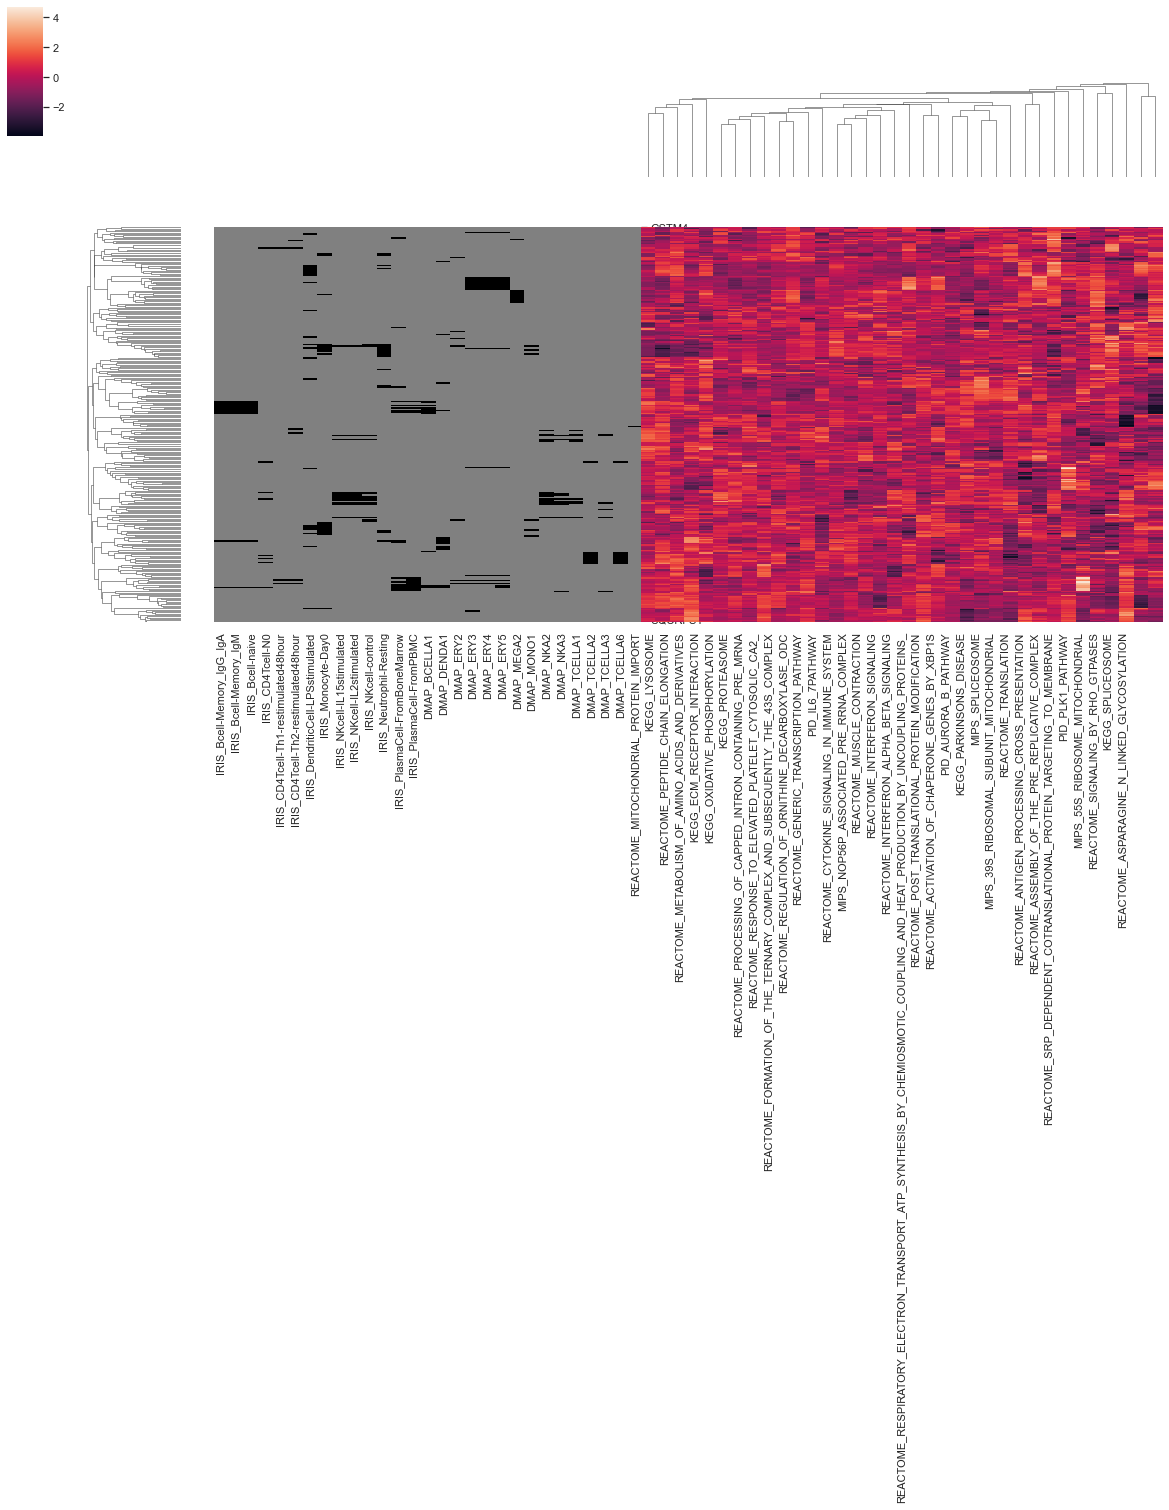

In [226]:
sns.clustermap(
    rowNorm(data.loc[nn, :]),
    # breaks = bb,
    # color = colorpanel(101, "green", "white", "red"),
    row_colors=annotation_row,
    # annotation_colors = anncol,
)